# Various Disease Prediction using Machine Learning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

C:\Users\boddu\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load the dataset

In [2]:
dftest = pd.read_csv('Testing.csv')
dftrain = pd.read_csv('Training.csv')

## Explore the Dataset

In [3]:
dftrain.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [4]:
dftest.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [5]:
dftrain.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.137805,0.344730,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.159756,0.366417,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4920.0,0.045122,0.207593,0.0,0.0,0.0,0.0,1.0
shivering,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
inflammatory_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
blister,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
yellow_crust_ooze,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0


In [6]:
dftest.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,42.0,0.166667,0.377195,0.0,0.0,0.0,0.0,1.0
skin_rash,42.0,0.190476,0.397437,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,42.0,0.047619,0.215540,0.0,0.0,0.0,0.0,1.0
shivering,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
inflammatory_nails,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
blister,42.0,0.023810,0.154303,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,42.0,0.047619,0.215540,0.0,0.0,0.0,0.0,1.0


In [7]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [8]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [9]:
dftrain.shape

(4920, 134)

In [10]:
dftest.shape

(42, 133)

In [11]:
dftrain.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [12]:
dftest.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [13]:
print(type(dftrain), type(dftest))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


## Data Preprocessing

In [14]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


#### Identify null values

In [15]:
null_columns = dftrain.columns[dftrain.isnull().any()]
dftrain[null_columns].isnull().sum()

Unnamed: 133    4920
dtype: int64

In [16]:
# drop 'Unnamed: 133'
dftrain.drop('Unnamed: 133', axis=1, inplace=True)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [17]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


#### Identify null values

In [18]:
null_columns=dftest.columns[dftest.isnull().any()]
dftest[null_columns].isnull().sum()

Series([], dtype: float64)

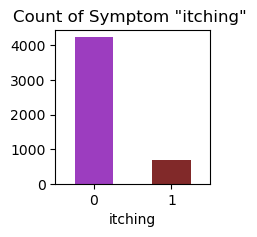

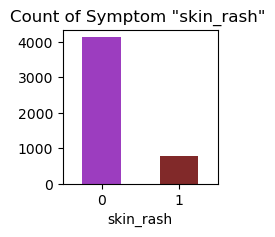

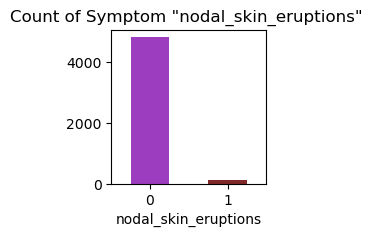

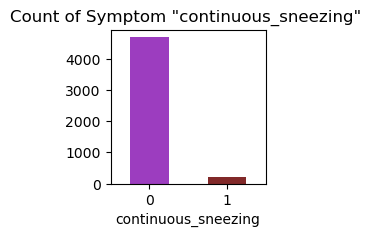

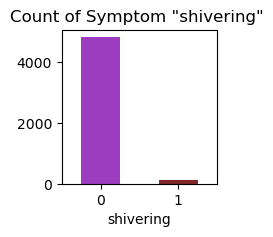

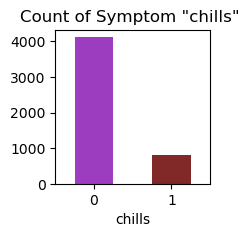

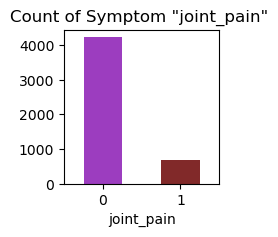

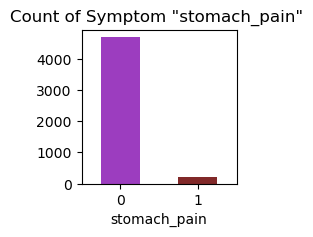

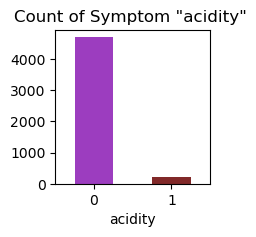

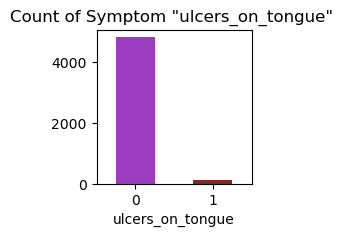

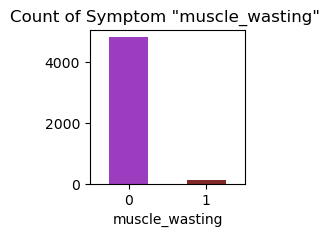

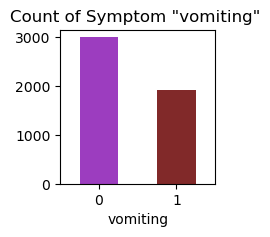

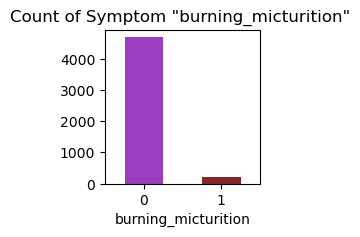

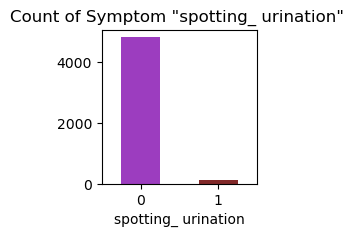

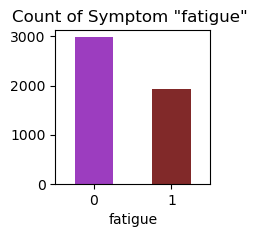

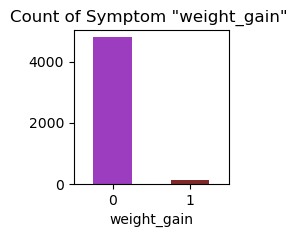

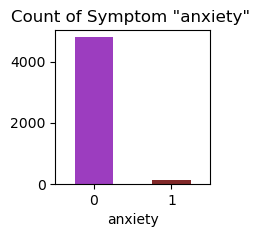

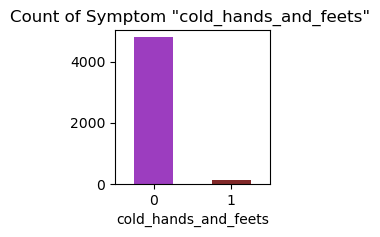

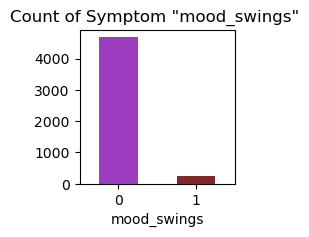

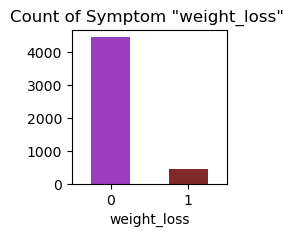

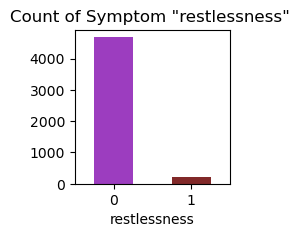

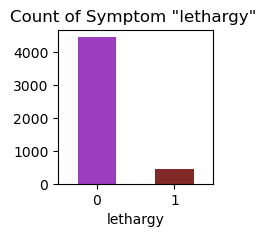

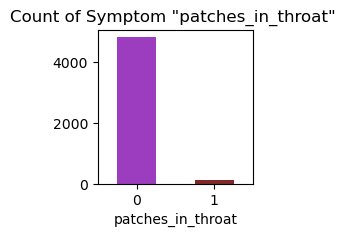

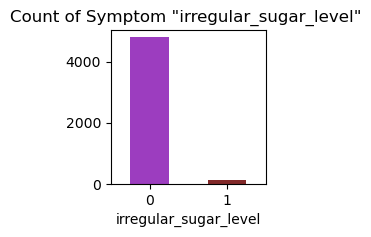

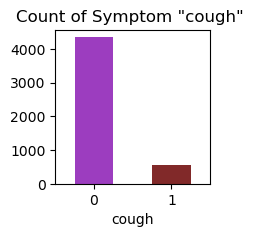

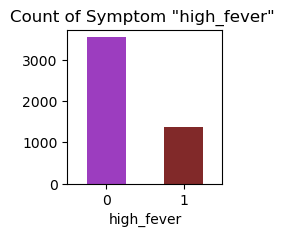

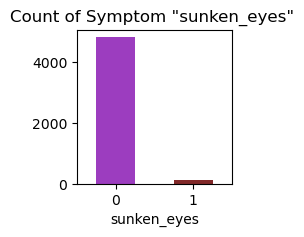

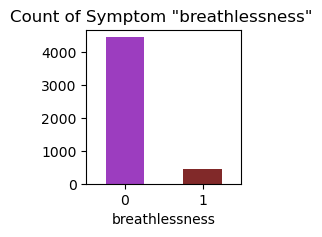

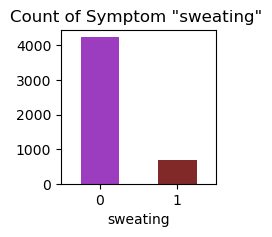

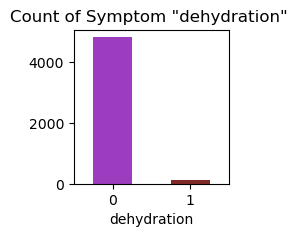

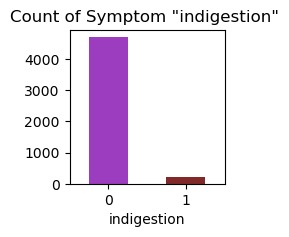

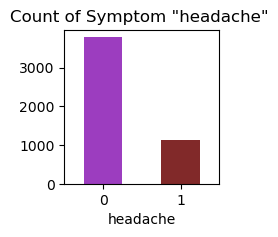

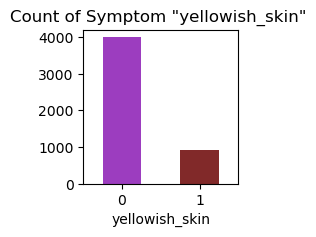

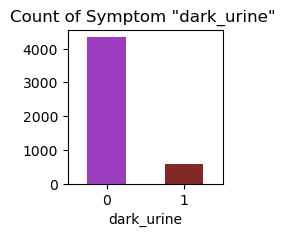

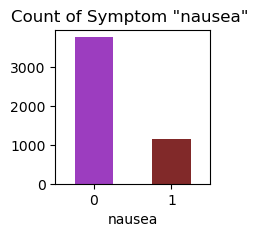

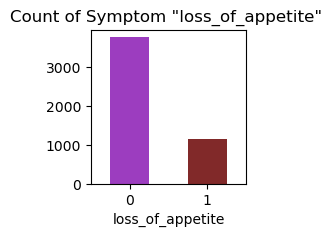

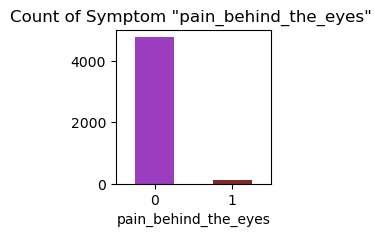

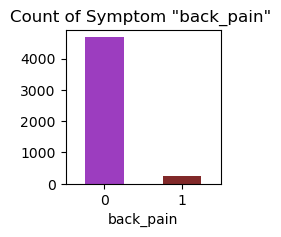

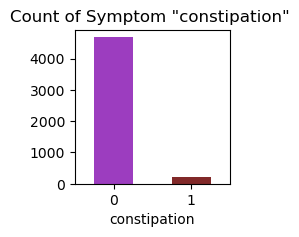

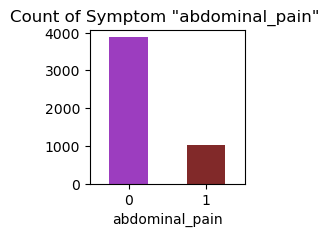

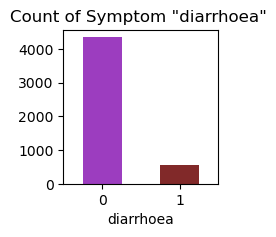

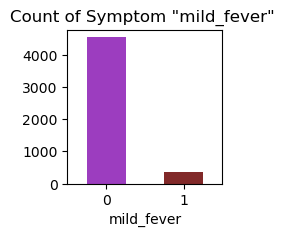

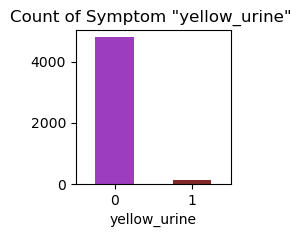

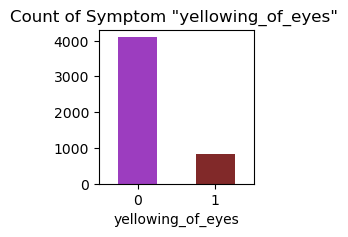

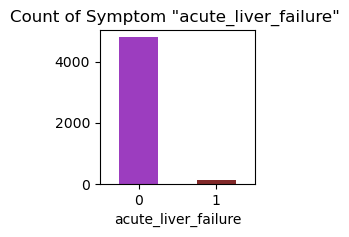

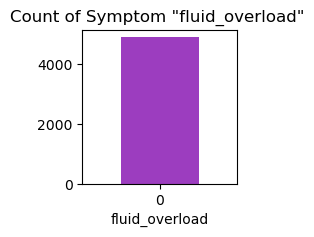

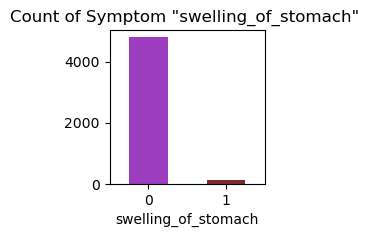

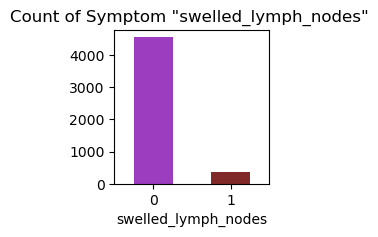

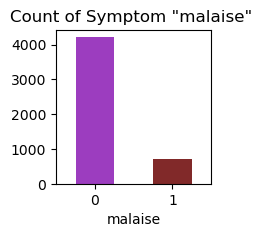

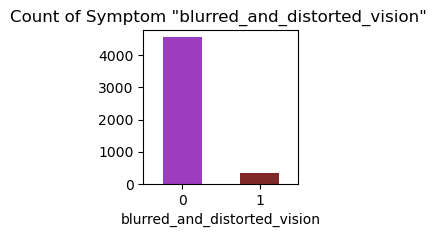

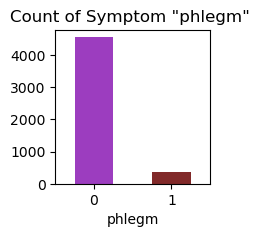

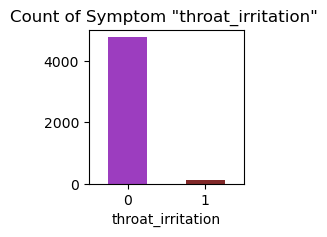

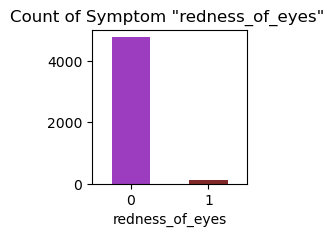

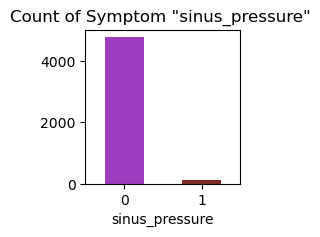

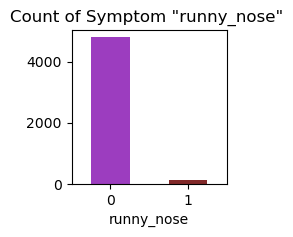

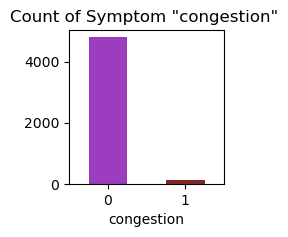

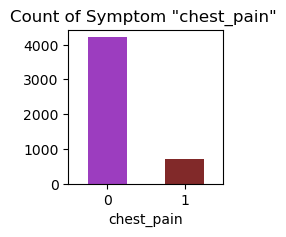

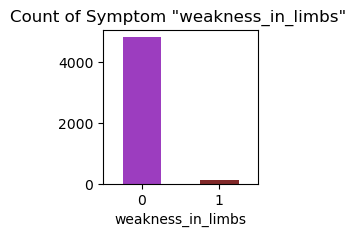

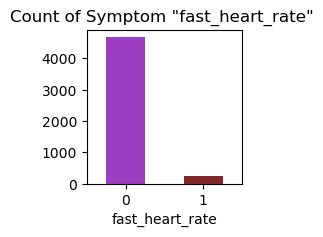

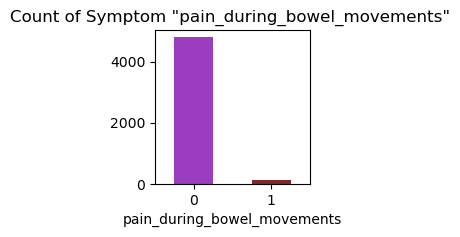

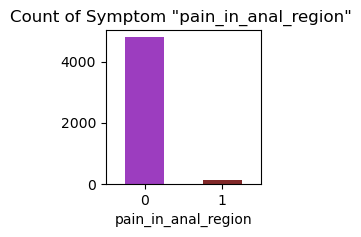

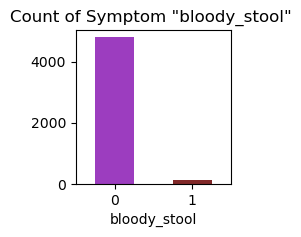

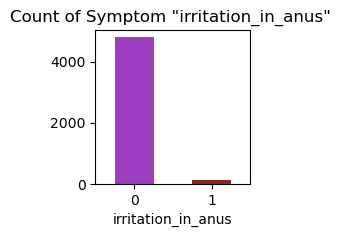

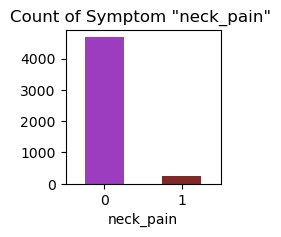

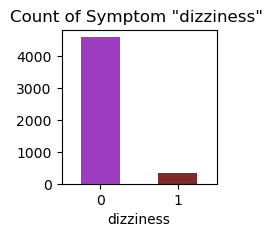

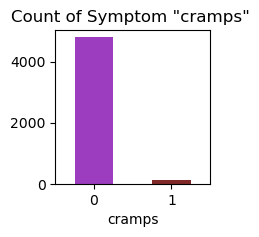

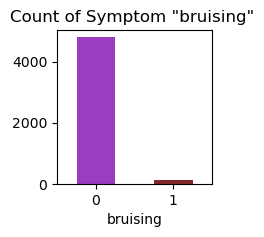

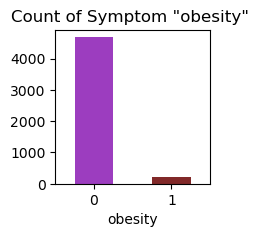

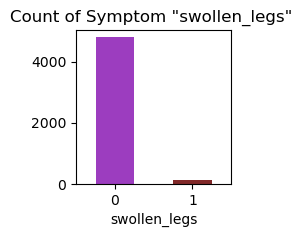

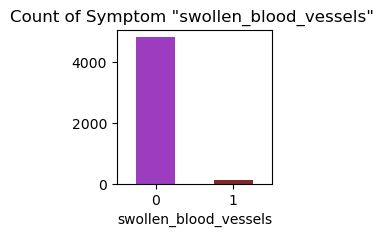

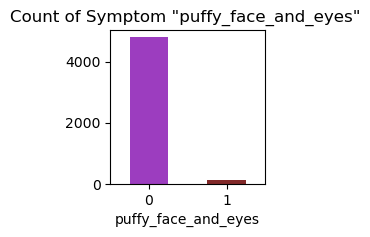

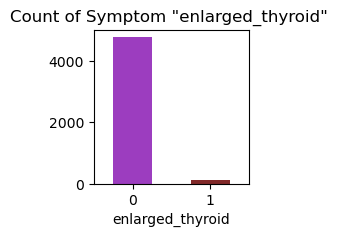

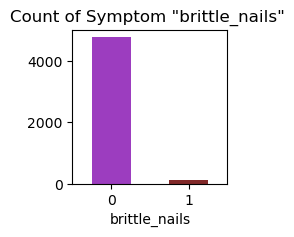

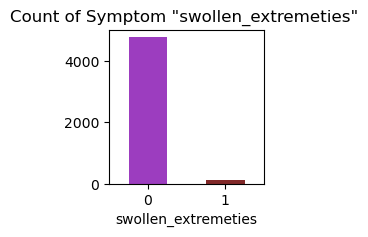

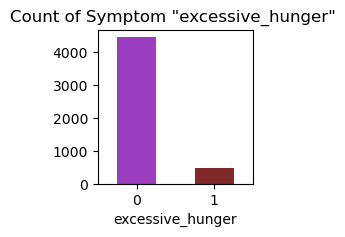

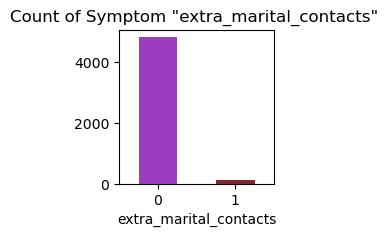

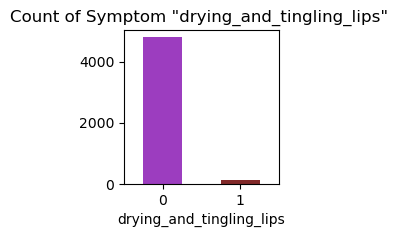

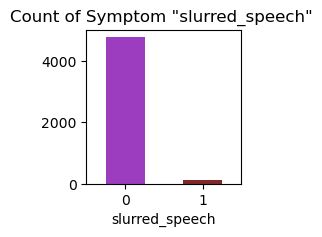

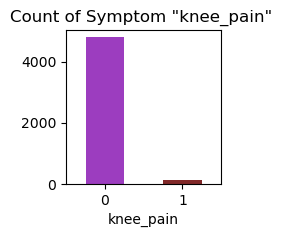

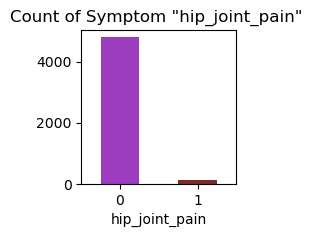

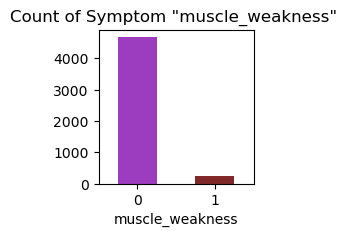

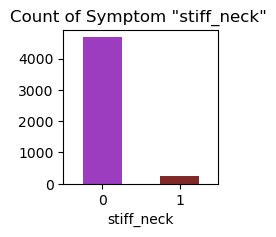

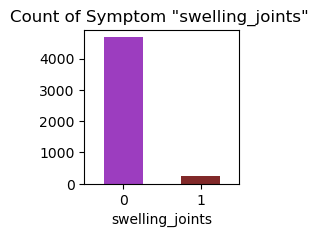

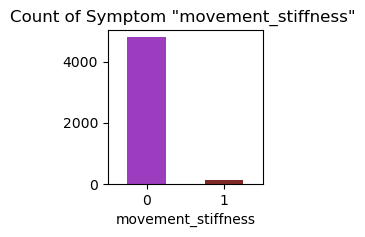

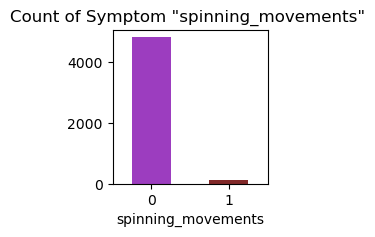

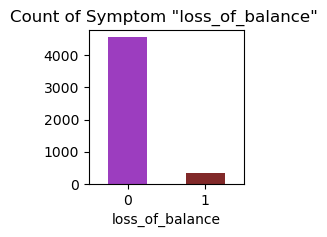

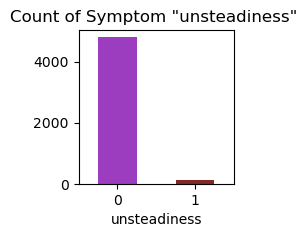

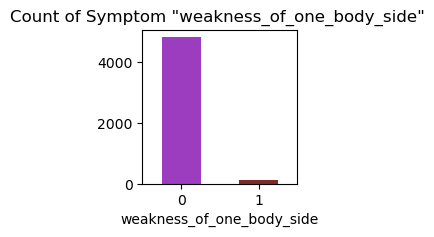

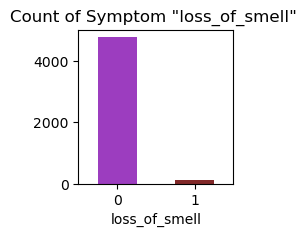

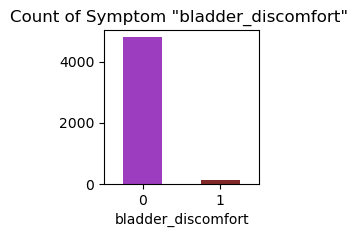

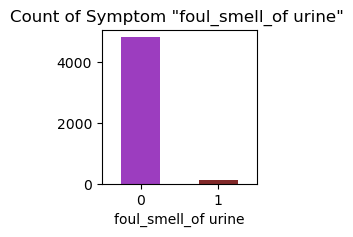

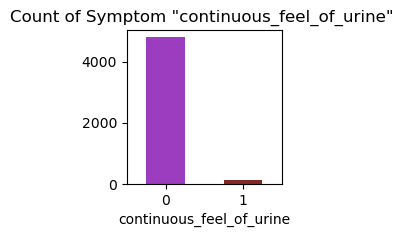

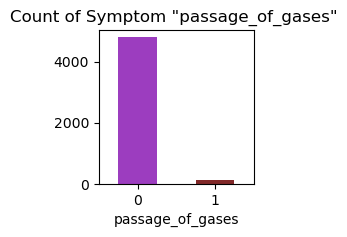

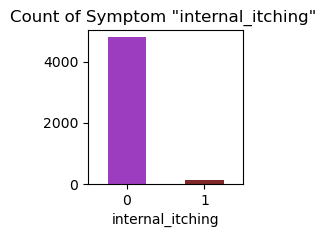

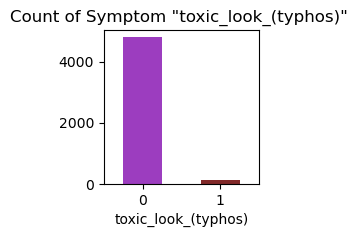

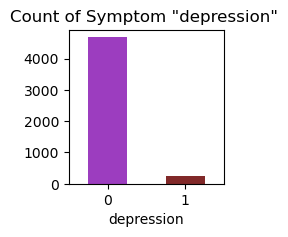

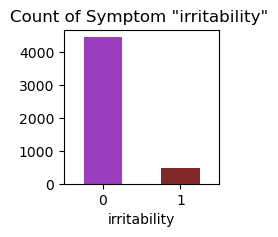

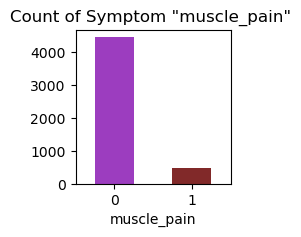

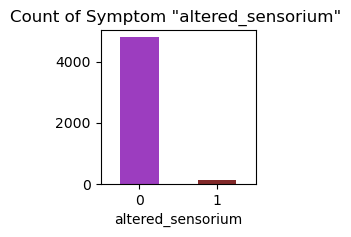

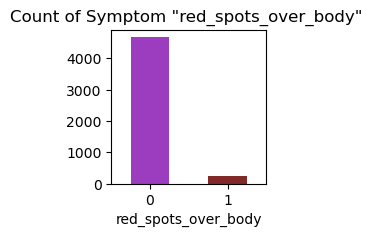

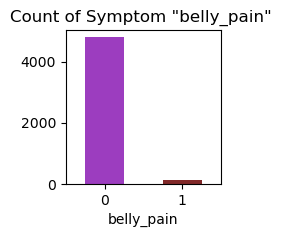

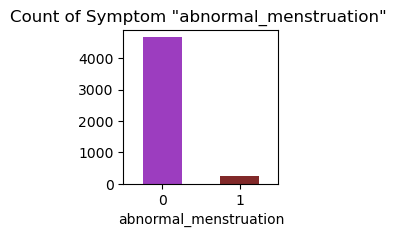

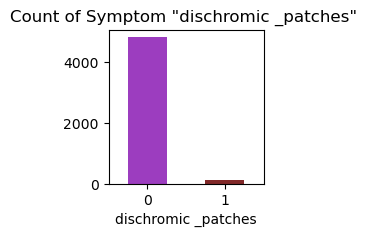

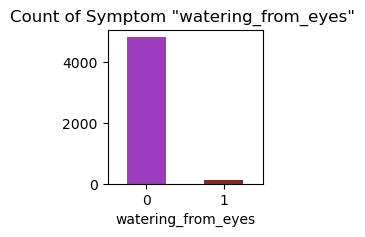

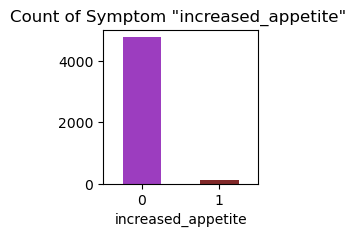

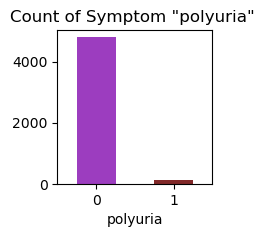

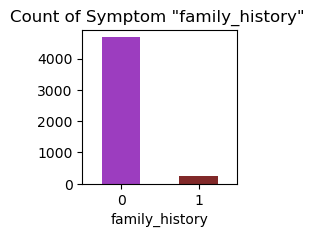

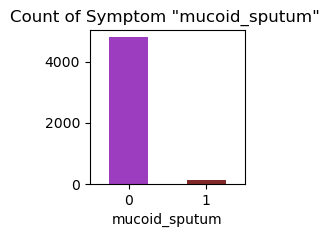

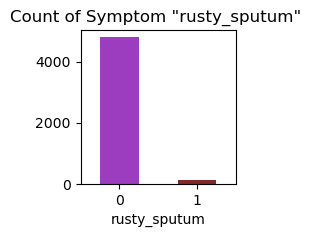

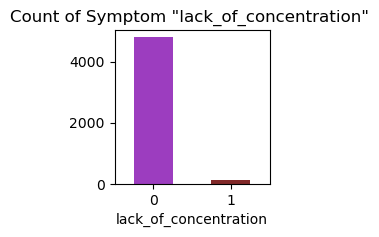

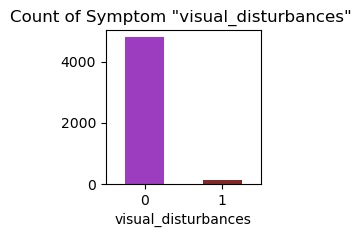

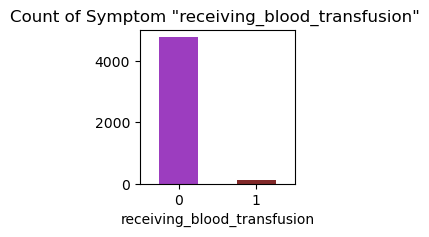

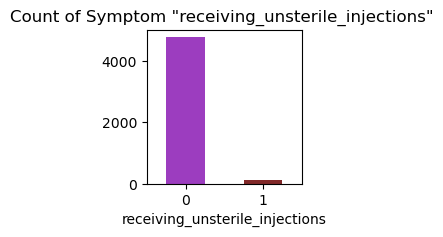

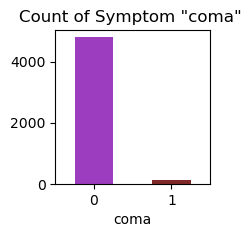

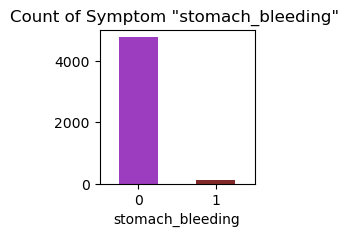

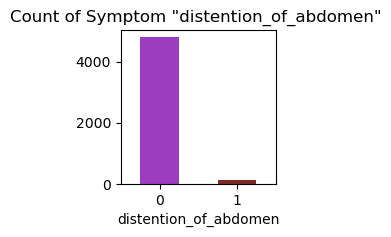

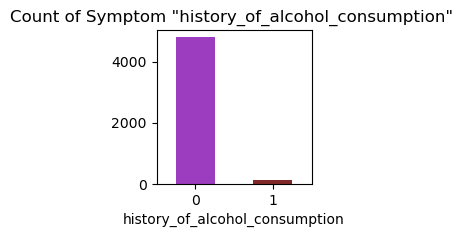

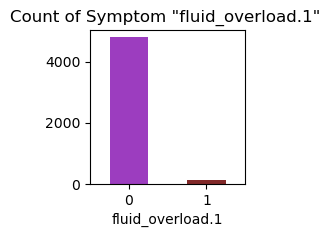

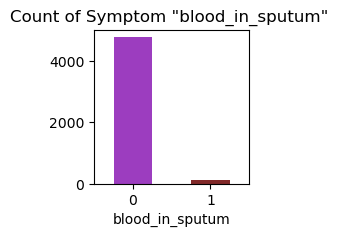

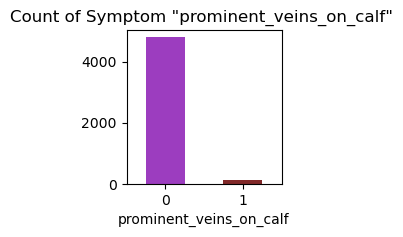

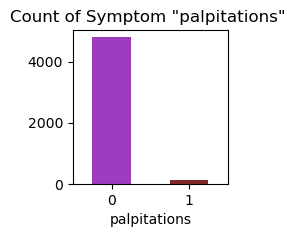

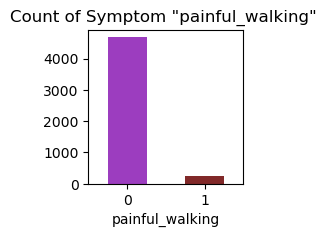

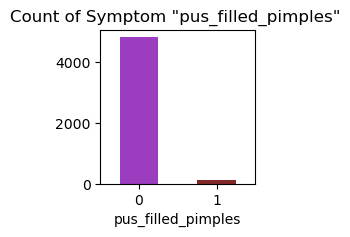

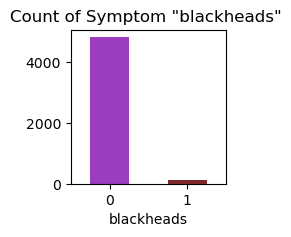

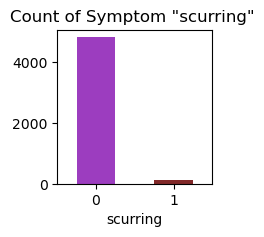

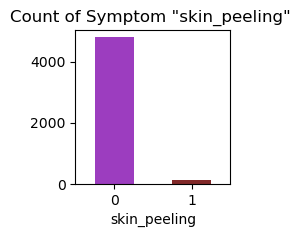

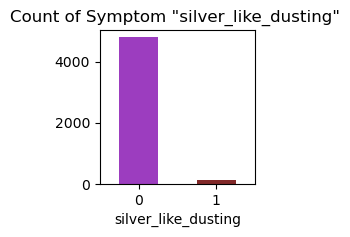

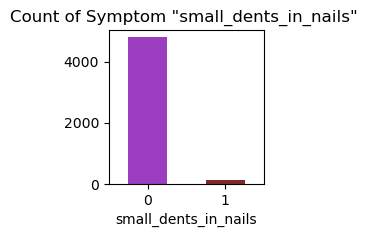

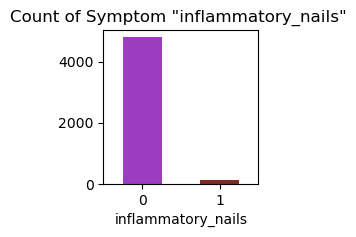

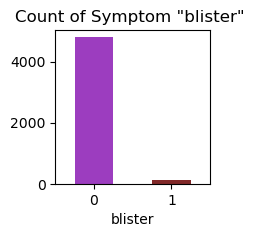

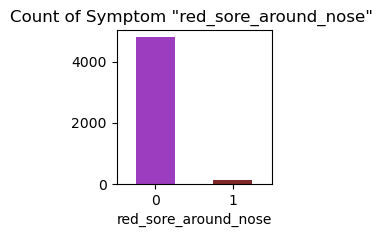

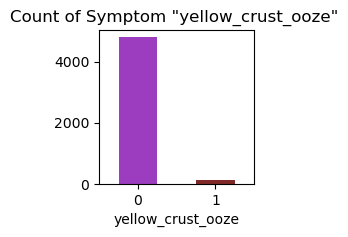

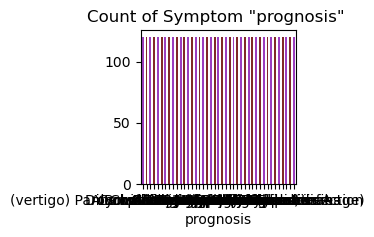

In [19]:
colors = ['#9c3dbf', '#812929']
columns = list(dftrain.columns)
# barplot of the count for all symptoms absence and presence
for i in columns :
   fig, ax = plt.subplots(figsize=(2,2))
   bar = dftrain.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
   plt.xticks(rotation=0)
   fig.suptitle("Count of Symptom \"" + i + "\"")

#### All symptoms sorted alphabetically

In [20]:
sorted(dftrain.prognosis.unique())

['(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A']

#### Identifying duplicate records

In [21]:
dftest[dftest.duplicated(subset = None, keep = False)]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis


## Exploratory Data Analysis

#### listing and counting the target class label names and their frequencies

In [22]:
from collections import Counter
count = Counter(dftrain['prognosis'])
count.items()

dict_items([('Fungal infection', 120), ('Allergy', 120), ('GERD', 120), ('Chronic cholestasis', 120), ('Drug Reaction', 120), ('Peptic ulcer diseae', 120), ('AIDS', 120), ('Diabetes ', 120), ('Gastroenteritis', 120), ('Bronchial Asthma', 120), ('Hypertension ', 120), ('Migraine', 120), ('Cervical spondylosis', 120), ('Paralysis (brain hemorrhage)', 120), ('Jaundice', 120), ('Malaria', 120), ('Chicken pox', 120), ('Dengue', 120), ('Typhoid', 120), ('hepatitis A', 120), ('Hepatitis B', 120), ('Hepatitis C', 120), ('Hepatitis D', 120), ('Hepatitis E', 120), ('Alcoholic hepatitis', 120), ('Tuberculosis', 120), ('Common Cold', 120), ('Pneumonia', 120), ('Dimorphic hemmorhoids(piles)', 120), ('Heart attack', 120), ('Varicose veins', 120), ('Hypothyroidism', 120), ('Hyperthyroidism', 120), ('Hypoglycemia', 120), ('Osteoarthristis', 120), ('Arthritis', 120), ('(vertigo) Paroymsal  Positional Vertigo', 120), ('Acne', 120), ('Urinary tract infection', 120), ('Psoriasis', 120), ('Impetigo', 120)]

#### Count of each target class label

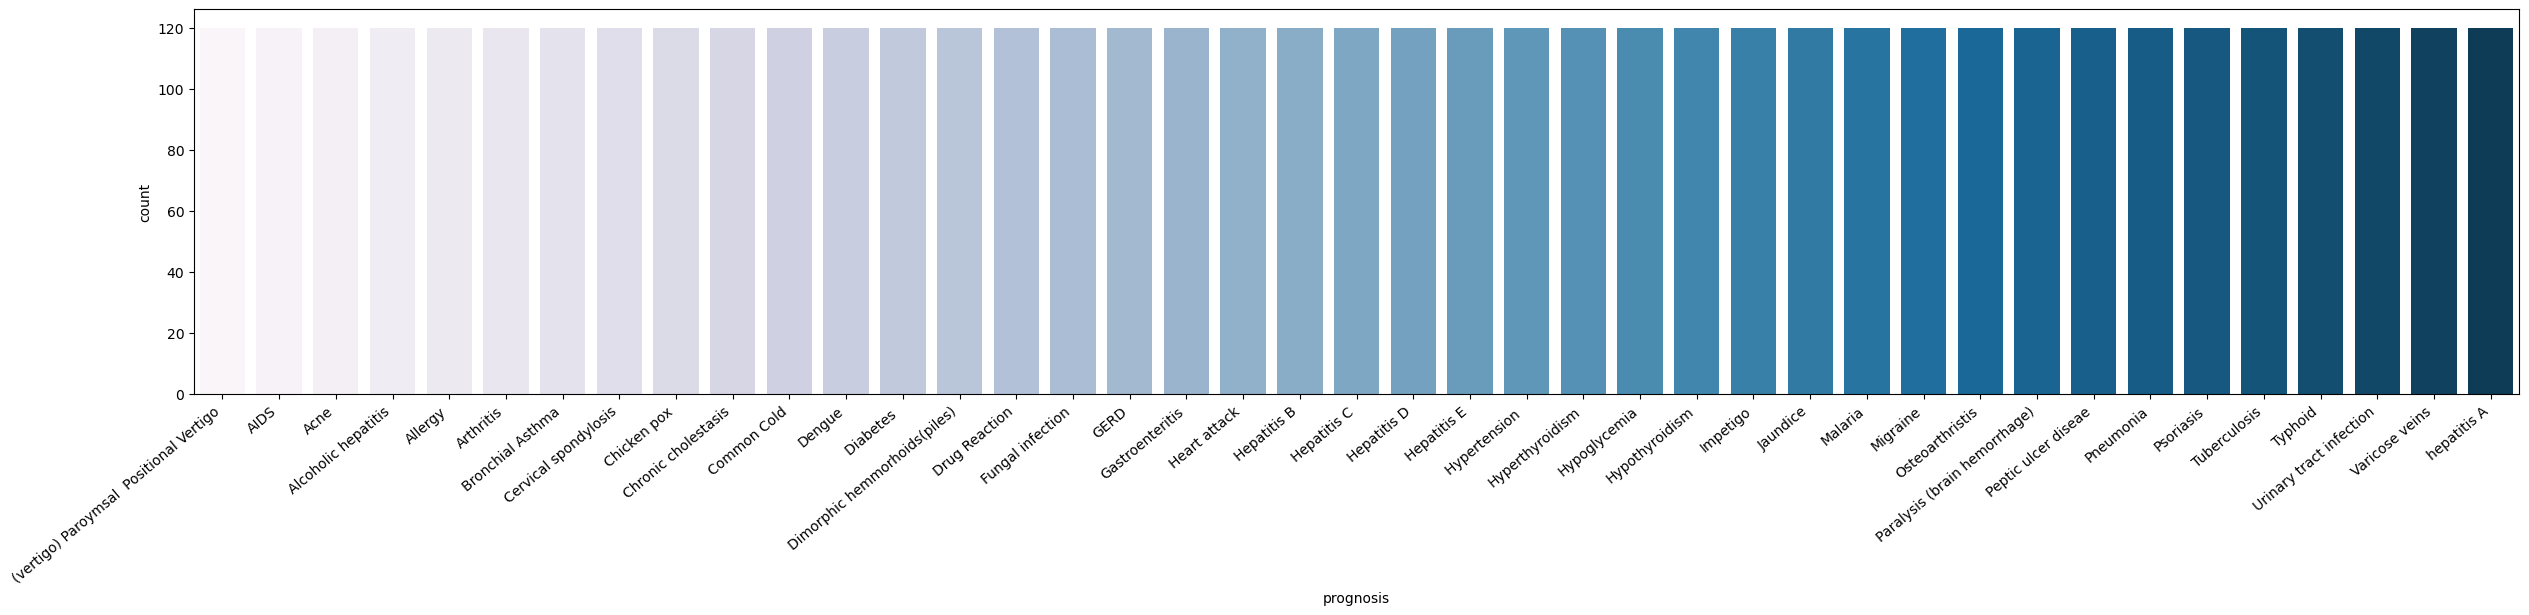

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'prognosis' is a categorical column, convert it to categorical data type
dftrain['prognosis'] = dftrain['prognosis'].astype('category')

# count of each target class label
plt.figure(figsize=(30, 5))
ax = sns.countplot(data=dftrain, x='prognosis', palette='PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

#### listing and counting the target class label names and their frequencies

In [24]:
count = Counter(dftest['prognosis'])
count.items()

dict_items([('Fungal infection', 2), ('Allergy', 1), ('GERD', 1), ('Chronic cholestasis', 1), ('Drug Reaction', 1), ('Peptic ulcer diseae', 1), ('AIDS', 1), ('Diabetes ', 1), ('Gastroenteritis', 1), ('Bronchial Asthma', 1), ('Hypertension ', 1), ('Migraine', 1), ('Cervical spondylosis', 1), ('Paralysis (brain hemorrhage)', 1), ('Jaundice', 1), ('Malaria', 1), ('Chicken pox', 1), ('Dengue', 1), ('Typhoid', 1), ('hepatitis A', 1), ('Hepatitis B', 1), ('Hepatitis C', 1), ('Hepatitis D', 1), ('Hepatitis E', 1), ('Alcoholic hepatitis', 1), ('Tuberculosis', 1), ('Common Cold', 1), ('Pneumonia', 1), ('Dimorphic hemmorhoids(piles)', 1), ('Heart attack', 1), ('Varicose veins', 1), ('Hypothyroidism', 1), ('Hyperthyroidism', 1), ('Hypoglycemia', 1), ('Osteoarthristis', 1), ('Arthritis', 1), ('(vertigo) Paroymsal  Positional Vertigo', 1), ('Acne', 1), ('Urinary tract infection', 1), ('Psoriasis', 1), ('Impetigo', 1)])

#### count of each target class label

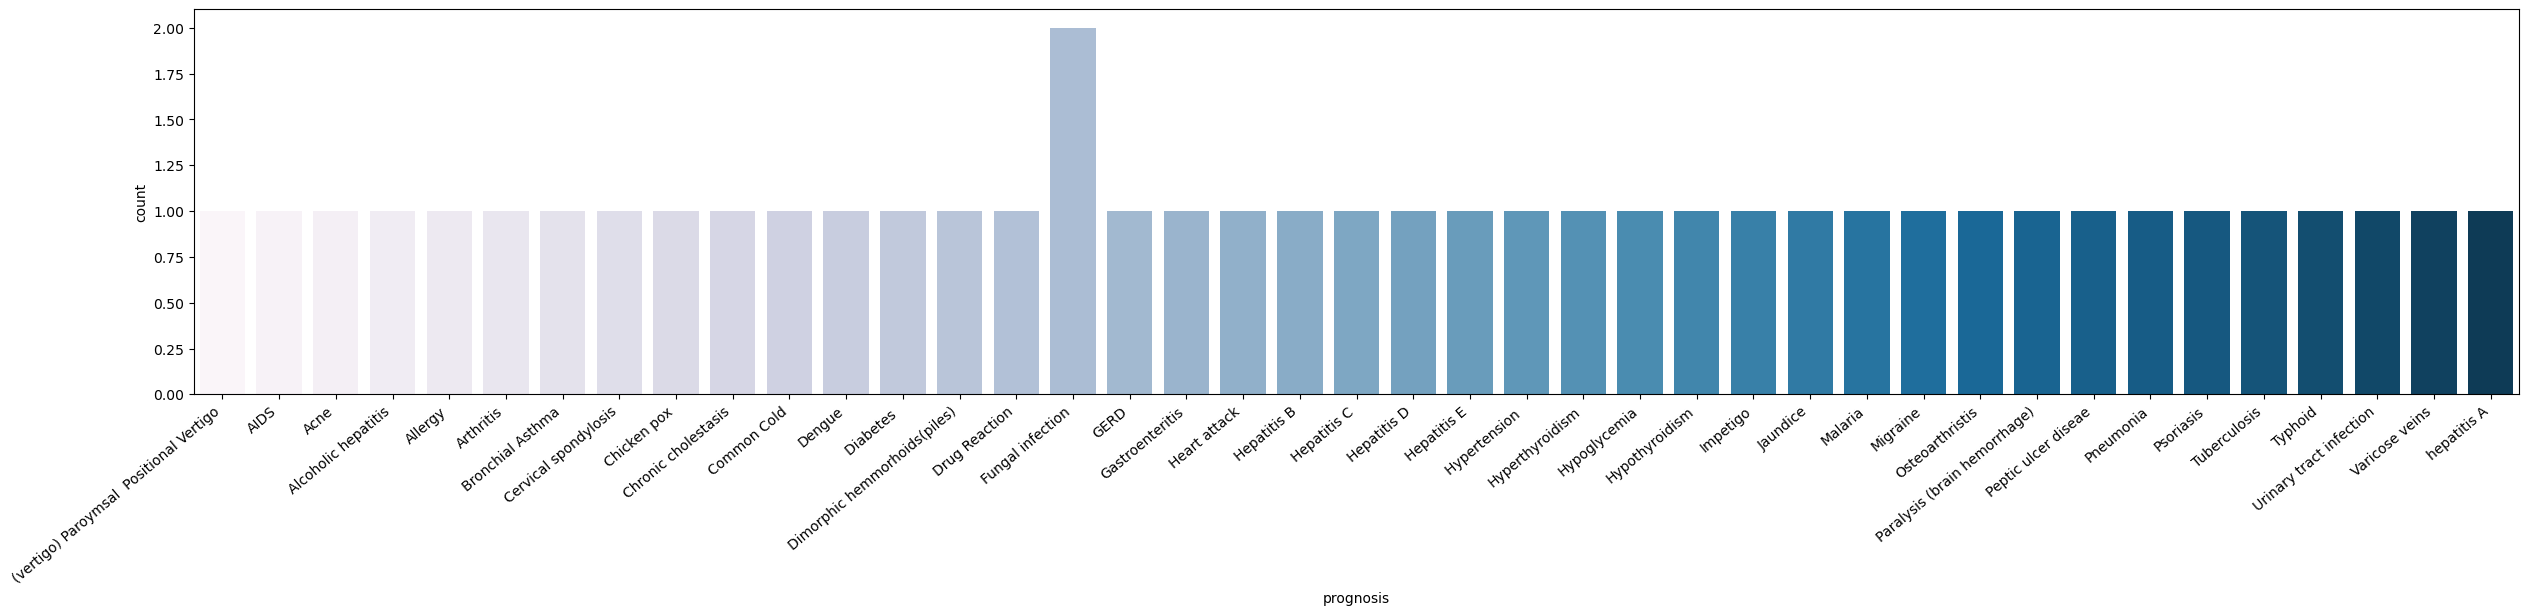

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'prognosis' column contains string values
dftest['prognosis'] = dftest['prognosis'].astype('category')

# Count of each target class label
plt.figure(figsize=(30, 5))
ax = sns.countplot(data=dftest, x='prognosis', palette='PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [26]:
# list of all symptoms
columns = list(dftrain.columns)
columns

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


## Data Modelling

#### Classifying and modelling the data by using Multilayer Perceptron (MLP) Neural Network, Decision Tree (DT), and Random Forest (RF) machine learning algorithms



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

# split dataset into attributes and labels
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 132].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 132].values # the testing labels

#### Using Decision Tree classifier based on information gain

In [28]:
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

#### Using Random Forest classifier

In [29]:
classifierRF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

#### Using MLP Classifier

In [30]:
classifierMLP = MLPClassifier()
classifierMLP.fit(X_train, y_train)

MLPClassifier()

## Model Evaluation

#### Using the three models to make predictions on test data

In [31]:
y_predMLP = classifierMLP.predict(X_test)
y_predDT = classifierDT.predict(X_test)
y_predRF = classifierRF.predict(X_test)

##### For MLP model

In [32]:
# using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predMLP))
print(classification_report(y_test, y_predMLP))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, classifierMLP.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predMLP))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

##### For Random Forest model

In [33]:
# using confusion matrix
print(confusion_matrix(y_test, y_predRF))
print(classification_report(y_test, y_predRF))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierRF.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predRF))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

##### For Decision Tree model

In [34]:
# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

### Models Visualization

In [35]:
n_groups = 3
algorithms = ('Multilayer Perceptron (MLP) Neural Network', 'Decision Tree (DT)', 'Random Forest (RF)')
train_accuracy = (accuracy_score(y_train, classifierMLP.predict(X_train))*100, 
                  accuracy_score(y_train, classifierDT.predict(X_train))*100, 
                  accuracy_score(y_train, classifierRF.predict(X_train))*100)
test_accuracy = (accuracy_score(y_test, y_predMLP)*100, 
                 accuracy_score(y_test, y_predDT)*100, 
                 accuracy_score(y_test, y_predRF)*100)

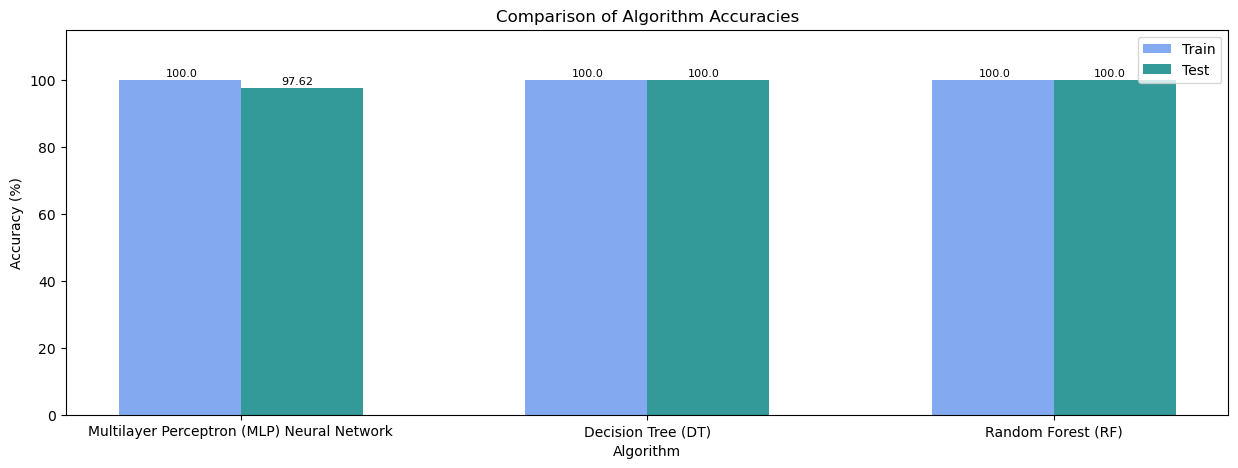

In [36]:
# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
plt.show()

### Model Interpretation

In [37]:
imp = classifierRF.feature_importances_
imp

array([0.02451708, 0.0376684 , 0.00272968, 0.00397628, 0.00174168,
       0.02395867, 0.02481154, 0.00866129, 0.00467464, 0.00177065,
       0.00309718, 0.0589808 , 0.0091516 , 0.00290619, 0.07104425,
       0.00071934, 0.00162486, 0.00057809, 0.00178988, 0.0081026 ,
       0.00281833, 0.01113803, 0.0022771 , 0.0009804 , 0.01103135,
       0.05371723, 0.00290376, 0.00836174, 0.02484782, 0.00241013,
       0.00310928, 0.03999102, 0.02788423, 0.01238925, 0.03097632,
       0.03323207, 0.00159061, 0.00435969, 0.00564213, 0.02755191,
       0.01822744, 0.00698245, 0.00091251, 0.02225285, 0.00228157,
       0.        , 0.00286495, 0.00577783, 0.01470771, 0.00429008,
       0.00491397, 0.00221956, 0.00090263, 0.00105679, 0.00133074,
       0.00161071, 0.02742698, 0.00144098, 0.00471829, 0.00404674,
       0.00362037, 0.00233512, 0.00362048, 0.00887342, 0.00960767,
       0.00230536, 0.00113432, 0.00519351, 0.00181993, 0.0008962 ,
       0.00072191, 0.0011138 , 0.00147156, 0.00106907, 0.01415

In [38]:
columns = columns[:132]
column_names = ['symptom', 'importance']
df3 = np.vstack((columns, imp)).T
df3 = pd.DataFrame(df3, columns = column_names)
df3

,symptom,importance
0,itching,0.02451707684416011
1,skin_rash,0.03766839728217514
2,nodal_skin_eruptions,0.00272968188723169
3,continuous_sneezing,0.003976284171716716
4,shivering,0.0017416803161676953
...,...,...
127,small_dents_in_nails,0.0037779995784576314
128,inflammatory_nails,0.0021674265279871575
129,blister,0.004153440663831653
130,red_sore_around_nose,0.0026158299482688606


In [39]:
!pip install plotly

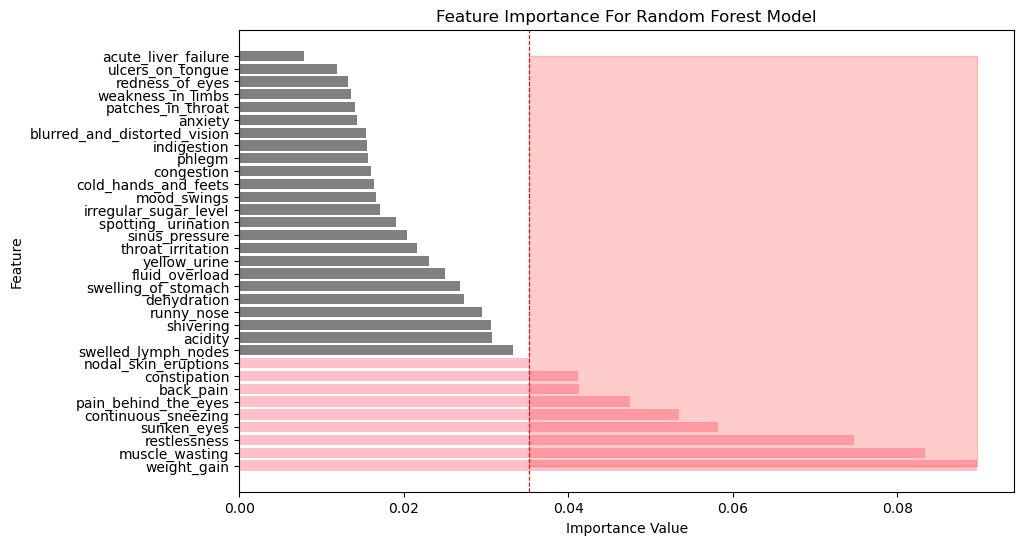

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Your classifierRF and columns should be defined before this point

# Get feature importances
coefficients = classifierRF.feature_importances_

# Set a minimum threshold for feature importance
importance_threshold = np.quantile(coefficients, q=0.75)

# Sort indices by importance in descending order
sorted_indices = np.argsort(coefficients)[::-1]
sorted_columns = [columns[i] for i in sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Barplot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_columns, sorted_coefficients, color=np.where(sorted_coefficients >= importance_threshold, 'pink', 'gray'))

# Draw a vertical line and shaded region for the importance threshold
plt.axvline(x=importance_threshold, color='red', linestyle='--', linewidth=0.8)
plt.fill_betweenx(sorted_columns, importance_threshold, max(sorted_coefficients), color='red', alpha=0.2)

plt.xlabel("Importance Value")
plt.ylabel("Feature")
plt.title("Feature Importance For Random Forest Model")
plt.show()

In [41]:
# identify features with feature importance values below the minimum threshold

import numpy
low_importance_features = numpy.array(df3.symptom[np.abs(coefficients) <= importance_threshold])
columns = list(low_importance_features)
columns

['nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'spotting_ urination',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'restlessness',
 'patches_in_throat',
 'irregular_sugar_level',
 'sunken_eyes',
 'dehydration',
 'indigestion',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'yellow_urine',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'weakness_in_limbs',
 'fast_heart_rate',
 'pain_during_bowel_movements',
 'pain_in_anal_region',
 'bloody_stool',
 'irritation_in_anus',
 'cramps',
 'bruising',
 'obesity',
 'swollen_legs',
 'swollen_blood_vessels',
 'puffy_face_and_eyes',
 'enlarged_thyroid',
 'brittle_nails',
 'swollen_extremeties',
 'extra_marital_contacts',
 'drying_and_tingling_lips',
 'slurred_speech',
 

In [42]:
# Low importance features are dropped

for i in columns :
    dftrain.drop(i, axis=1, inplace=True)
    dftest.drop(i, axis=1, inplace=True)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   itching              4920 non-null   int64   
 1   skin_rash            4920 non-null   int64   
 2   chills               4920 non-null   int64   
 3   joint_pain           4920 non-null   int64   
 4   stomach_pain         4920 non-null   int64   
 5   vomiting             4920 non-null   int64   
 6   burning_micturition  4920 non-null   int64   
 7   fatigue              4920 non-null   int64   
 8   weight_loss          4920 non-null   int64   
 9   lethargy             4920 non-null   int64   
 10  cough                4920 non-null   int64   
 11  high_fever           4920 non-null   int64   
 12  breathlessness       4920 non-null   int64   
 13  sweating             4920 non-null   int64   
 14  headache             4920 non-null   int64   
 15  yellowish_skin       

In [43]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   itching              42 non-null     int64   
 1   skin_rash            42 non-null     int64   
 2   chills               42 non-null     int64   
 3   joint_pain           42 non-null     int64   
 4   stomach_pain         42 non-null     int64   
 5   vomiting             42 non-null     int64   
 6   burning_micturition  42 non-null     int64   
 7   fatigue              42 non-null     int64   
 8   weight_loss          42 non-null     int64   
 9   lethargy             42 non-null     int64   
 10  cough                42 non-null     int64   
 11  high_fever           42 non-null     int64   
 12  breathlessness       42 non-null     int64   
 13  sweating             42 non-null     int64   
 14  headache             42 non-null     int64   
 15  yellowish_skin       42 n

In [44]:
# Split datasets into labels
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 33].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 33].values # the testing labels

# using DT based on information gain
classifierRF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

In [45]:
y_predRF = classifierRF.predict(X_test)

# using confusion matrix
print(confusion_matrix(y_test, y_predRF))
print(classification_report(y_test, y_predRF))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierRF.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predRF))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

#### New data on 33 attributes

In [46]:
newdata = [[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 
            0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1]]

# compute probabilities of assigning to each of the classes of prognosis
probaRF = classifierRF.predict_proba(newdata)
probaRF.round(4) # round probabilities to four decimal places, if applicable

array([[0.  , 0.  , 0.  , 0.1 , 0.  , 0.  , 0.  , 0.  , 0.02, 0.08, 0.01,
        0.  , 0.03, 0.  , 0.08, 0.04, 0.  , 0.  , 0.  , 0.13, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.13, 0.  , 0.  , 0.36, 0.  ,
        0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [47]:
# Make prediction
predRF = classifierRF.predict(newdata)
predRF

array(['Osteoarthristis'], dtype=object)

In [48]:
newdata = [[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 
            0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1]]

# compute probabilities of assigning to each of the classes of prognosis
probaRF = classifierRF.predict_proba(newdata)
probaRF.round(4) # round probabilities to four decimal places, if applicable

array([[0.    , 0.    , 0.    , 0.0033, 0.    , 0.    , 0.02  , 0.    ,
        0.02  , 0.02  , 0.0414, 0.    , 0.0098, 0.    , 0.01  , 0.    ,
        0.04  , 0.    , 0.1   , 0.06  , 0.    , 0.0323, 0.    , 0.    ,
        0.0845, 0.08  , 0.06  , 0.    , 0.2615, 0.01  , 0.    , 0.02  ,
        0.    , 0.0067, 0.0686, 0.    , 0.0302, 0.0117, 0.    , 0.    ,
        0.01  ]])

In [49]:
predRF = classifierRF.predict(newdata)
predRF

array(['Jaundice'], dtype=object)